In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split

### Prob 2.1

In [3]:
df = pd.read_csv('data/D2z.txt',sep=' ',names=['f1','f2','y'])
df

,f1,f2,y
0,-0.333338,-0.087171,0
1,-1.531730,0.358194,1
2,1.549590,-0.364050,0
3,-1.349910,0.252063,1
4,1.283850,-0.531146,0
...,...,...,...
195,-0.697750,1.098280,1
196,1.161160,-0.733751,0
197,-1.288480,0.443773,1
198,-1.384200,0.526523,1


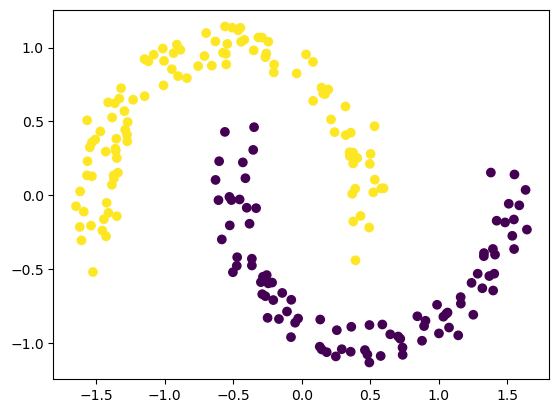

In [4]:
plt.scatter(x='f1', y='f2', data=df, c='y')

In [9]:
grid = list(itertools.product(np.linspace(-2,2,41), np.linspace(-2,2,41)))
testx1,testx2 = list(zip(*grid))
y_pred=[]
for i in grid:
    y_pred.append(NN_1(df.values, np.array(i)))

#### KNN Implementation

In [272]:
####   KNN Implementation

def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def NN_1(train, test_i):
    eud = 999
    cls=0
    for i in train:
        d = euclidean_distance(i[:-1], test_i)
        if d<eud:
            eud=d
            cls=i[-1] 
    return cls
def most_frequent(List):
    return max(set(List), key = List.count)

def NN_k(train, test_i, k):
    trX= train[:,:-1]
    trY= train[:,-1]
    eud = 999
    cls=0
    d=[]
    for i in trX:
        # print('a',i[:-1], test_i)
        d.append(euclidean_distance(i, test_i))
    # print(d)
    idx = np.argsort(d)
    # print(idx)
    # print(most_frequent(list(trY[idx][:k])))
    return most_frequent(list(trY[idx][:k]))

def knn_pred(train, test, k):    
    y_pred=[]
    for i in test:
        if k==1:
            y_pred.append(NN_1(train, np.array(i)))
        else:
            y_pred.append(NN_k(train, np.array(i), k)) 
    return y_pred

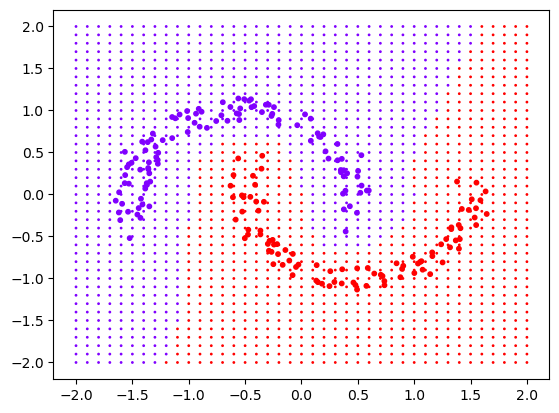

In [222]:
plt.scatter(testx1,testx2,s=1, c=y_pred, cmap='rainbow_r')
plt.scatter(x='f1', y='f2', data=df, c='y',s=10, cmap='rainbow_r')

### Prob 2.2

In [223]:
emails = pd.read_csv('data/emails.csv')
emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [267]:

def kfold(data, k):
    folds=[]
    f_size=int(len(data)/k)
    for i in range(k):
        test = data[i*f_size:(i+1)*f_size]
        train = np.vstack((data[:i*f_size] , data[(i+1)*f_size:]))
        folds.append((train,test))
    return folds

In [296]:
accuracy=[]
precision=[]
recall=[]
for train, test in kfold(emails.drop('Email No.',axis=1).values, 5):
    
    ytest = test[:,-1]
    ypred = knn_pred(train, test[:,:-1],1)
    acc = accuracy_score(ytest, ypred)
    p = precision_score(ytest, ypred)
    r =recall_score(ytest, ypred)
    accuracy.append(acc)
    precision.append(p)
    recall.append(r)
    print(acc)

print(list(zip(accuracy,precision, recall)))


0.825
0.853
0.862
0.851
0.776
[(0.825, 0.6544943820224719, 0.8175438596491228), (0.853, 0.6857142857142857, 0.8664259927797834), (0.862, 0.7212121212121212, 0.8380281690140845), (0.851, 0.7164179104477612, 0.8163265306122449), (0.776, 0.6073298429319371, 0.7581699346405228)]


### Prob 2.4

In [275]:
k_accuracy=[]
precision=[]
recall=[]
kf =5
ks =[1,3,5,7,10]
for k in ks:
    acc=[]
    for train, test in kfold(emails.drop('Email No.',axis=1).values, kf):
        # print(len(train))
        ytest = test[:,-1]
        ypred = knn_pred(train, test[:,:-1], k)
        # acc = accuracy_score(ytest, ypred)
        p = precision_score(ytest, ypred)
        r =recall_score(ytest, ypred)
        acc.append(accuracy_score(ytest, ypred))
        # precision.append(p)
        # recall.append(r)
        # print(acc)
        
    k_accuracy.append(acc)
print(k_accuracy)

[[0.825, 0.853, 0.862, 0.851, 0.776], [0.846, 0.85, 0.856, 0.88, 0.773], [0.837, 0.852, 0.871, 0.869, 0.78], [0.837, 0.861, 0.875, 0.874, 0.779], [0.863, 0.869, 0.878, 0.887, 0.782]]


In [278]:
np.mean(k_accuracy, axis=1)

array([0.8334, 0.841 , 0.8418, 0.8452, 0.8558])

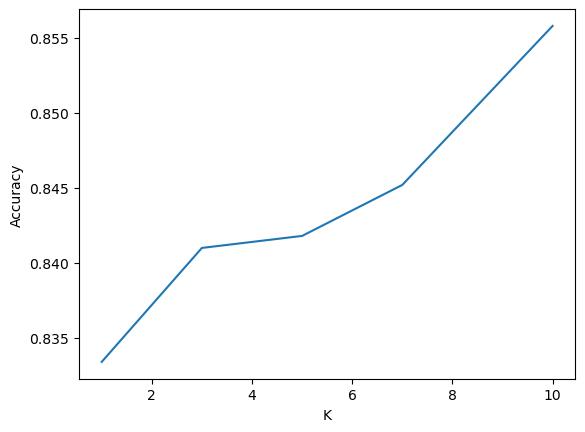

In [277]:

plt.plot(ks, np.mean(k_accuracy, axis=1))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


### Prob 1.5

In [280]:
roc = pd.read_csv('roc.csv',names=['y_pred','y'])
roc

,y_pred,y
0,0.95,1
1,0.85,1
2,0.80,0
3,0.70,1
4,0.55,1
5,0.45,0
6,0.40,1
7,0.30,1
8,0.20,0
9,0.10,0


Text(0, 0.5, 'True positive rate')

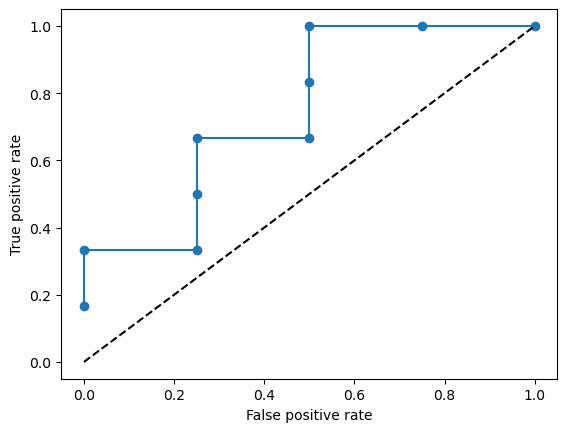

In [295]:
fpr, tpr, thresholds = roc_curve(roc['y'], roc['y_pred'],drop_intermediate =False)
tpr=np.array([1,2,2,3,4,4,5,6,6,6])/6
fpr=np.array([0,0,1,1,1,2,2,2,3,4])/4

plt.plot(fpr,tpr)
plt.scatter(fpr,tpr)
plt.plot([0,1],[0,1],'--', color='black')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Prob 2.3

#### Logistic Regression implementation

In [227]:
class Logistic():
    def __init__(self, X, lr=0.1, epochs=100) :
        self.theta=np.zeros((X.shape[1],1))
        self.lr=lr
        self.epochs=epochs
    def sigmoid(self, z):
        return 1.0/(1 + np.exp(-z))
    # def normalize(self, X):
    
    #     # X --> Input.
        
    #     # m-> number of training examples
    #     # n-> number of features 
    #     m, n = X.shape
        
    #     # Normalizing all the n features of X.
    #     for i in range(n):
    #         X = (X - X.mean(axis=0))/X.std(axis=0)
            
    #     return X

    def loss(self,y, y_hat):
        loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
        return loss
    def gradient(self,x,y,theta):
        yhat = self.sigmoid(np.dot(x, theta))
        dL =  np.dot(x.T, (yhat - y))/len(x)
        return dL
    def train(self, X, y):
        m,n = X.shape
        theta = self.theta
        losses=[]
        # X = normalize(X)
        sc = StandardScaler()
        # X = sc.fit_transform(X)
        y=y.reshape(m,1)
        for epoch in range(self.epochs):
            dL = self.gradient(X, y, theta)

            theta-= self.lr*dL
            # if (theta == self.theta).all():
            #     break
            losses.append(self.loss(y, self.sigmoid(np.dot(X, self.theta))  ))

        self.theta=theta
        return theta, losses
    def predict_prob(self, X):
        yhat = self.sigmoid(np.dot(X, self.theta))
        return yhat
    def predict_class(self, X):
        yhat = self.sigmoid(np.dot(X, self.theta))
        # print(yhat)
        return np.array([1 if i > 0.5 else 0 for i in yhat])
            
        



In [228]:
lr = Logistic(df.drop('y',axis=1).values, 0.01)
weights, losses = lr.train(df.drop('y',axis=1).values, df['y'].values)
recall_score(lr.predict_class(df.drop('y',axis=1).values), df['y'].values)

0.8333333333333334

In [229]:
accuracy=[]
precision=[]
recall=[]
lr = 0.1
epochs=10

for train, test in kfold(emails.drop('Email No.',axis=1).values, 5):
    trainX = train[:,:-1]
    trainy = train[:,-1]
    testX = test[:,:-1]
    testy = test[:,-1]
    logreg = Logistic(trainX, lr=0.1, epochs=1000)
    weights, loss = logreg.train(trainX, trainy)
    ypred = logreg.predict_class(testX)

    acc = accuracy_score(testy, ypred)
    p = precision_score(testy, ypred)
    r =recall_score(testy, ypred)
    accuracy.append(acc)
    precision.append(p)
    recall.append(r)
    print(acc, p, r)

print(list(zip(accuracy,precision, recall)))

C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:23: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:23: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
c:\Users\tapan\anaconda3\envs\al\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


0.909 0.8911290322580645 0.775438596491228


C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:23: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:23: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
c:\Users\tapan\anaconda3\envs\al\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


0.854 0.901840490797546 0.5306859205776173


C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:23: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:23: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
c:\Users\tapan\anaconda3\envs\al\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


0.889 0.8215613382899628 0.778169014084507


C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:23: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:23: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
c:\Users\tapan\anaconda3\envs\al\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


0.843 0.6634844868735084 0.9455782312925171


C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:23: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:23: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
c:\Users\tapan\anaconda3\envs\al\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


0.849 0.7859778597785978 0.696078431372549
[(0.909, 0.8911290322580645, 0.775438596491228), (0.854, 0.901840490797546, 0.5306859205776173), (0.889, 0.8215613382899628, 0.778169014084507), (0.843, 0.6634844868735084, 0.9455782312925171), (0.849, 0.7859778597785978, 0.696078431372549)]


### Prob 2.5

0.9487535612535613
0.8582970923647555


C:\Users\tapan\AppData\Local\Temp\ipykernel_36584\3531101958.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))


Text(0, 0.5, 'True positive rate')

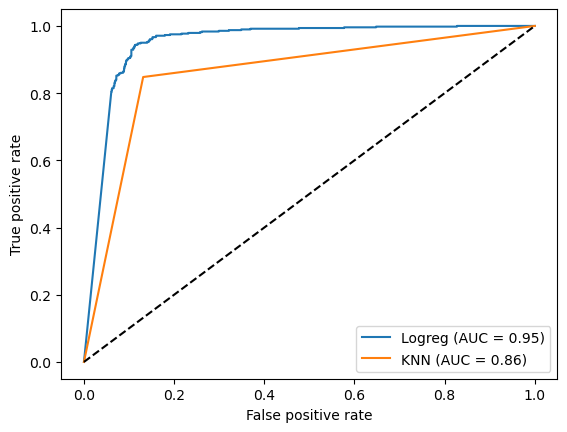

In [252]:
X_train, X_test, y_train, y_test = train_test_split(emails.drop(['Email No.','Prediction'],axis=1).values, emails['Prediction'].values, test_size=0.33, random_state=42)
lr = Logistic(X_train, 0.1, epochs=1000)
weights, losses = lr.train(X_train, y_train)
y_pred = lr.predict_class(X_test)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, lr.predict_prob(X_test)))
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_prob(X_test))

train_knn, test_knn = train_test_split(emails.drop(['Email No.'],axis=1).values, test_size=0.3, random_state=42)

ypred = knn_pred(train_knn, test_knn[:,:-1],1)
print(classification_report(test_knn[:,-1], ypred))
print(roc_auc_score(test_knn[:,-1], ypred))
fpr_knn, tpr_knn, _ = roc_curve(test_knn[:,-1], ypred)

plt.plot(fpr_lr, tpr_lr, label='Logreg (AUC = ' +'0.95)')
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = ' +'0.86)')
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'--', color='black')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')


In [241]:
fpr_lr, tpr_lr

(array([0.        , 0.06068376, 0.06153846, 0.06153846, 0.06239316,
        0.06239316, 0.06581197, 0.06581197, 0.06752137, 0.06752137,
        0.06837607, 0.06837607, 0.06923077, 0.06923077, 0.07094017,
        0.07094017, 0.07179487, 0.07179487, 0.07521368, 0.07521368,
        0.07777778, 0.07777778, 0.08119658, 0.08119658, 0.08290598,
        0.08632479, 0.08632479, 0.08803419, 0.08803419, 0.08888889,
        0.08888889, 0.08974359, 0.08974359, 0.09059829, 0.09059829,
        0.09145299, 0.09145299, 0.09230769, 0.09230769, 0.09316239,
        0.09316239, 0.09401709, 0.09401709, 0.0957265 , 0.0957265 ,
        0.0974359 , 0.0974359 , 0.0982906 , 0.0982906 , 0.1017094 ,
        0.1017094 , 0.1034188 , 0.1034188 , 0.10512821, 0.10512821,
        0.10512821, 0.10940171, 0.10940171, 0.11025641, 0.11025641,
        0.11196581, 0.11196581, 0.11282051, 0.11282051, 0.11367521,
        0.11367521, 0.11880342, 0.11880342, 0.11965812, 0.11965812,
        0.12564103, 0.12564103, 0.12820513, 0.12